# Goal 1] Logistic Regression

# 1 )   Create Model


In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics

from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [381]:
import warnings
warnings.filterwarnings('ignore')

In [382]:
df = pd.read_csv('PROJECT SUPERVISED.csv')

In [383]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [384]:
df.shape

(1470, 45)

In [385]:
df.dtypes

Age                                  float64
Attrition                              int64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
OverTime                             float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCompany                       float64
YearsInCur

In [386]:
df.info

<bound method DataFrame.info of            Age  Attrition  DailyRate  DistanceFromHome  Education  \
0     0.446350          1   0.742527         -1.505350  -0.891688   
1     1.322365          0  -1.297775          0.252002  -1.868426   
2     0.008343          1   1.414363         -1.031607  -0.891688   
3    -0.429664          0   1.461466         -0.695482   1.061787   
4    -1.086676          0  -0.524295         -1.031607  -1.868426   
...        ...        ...        ...               ...        ...   
1465 -0.101159          0   0.202082          1.397995  -0.891688   
1466  0.227347          0  -0.469754         -0.041631  -1.868426   
1467 -1.086676          0  -1.605183         -0.434763   0.085049   
1468  1.322365          0   0.546677         -1.031607   0.085049   
1469 -0.320163          0  -0.432568          0.252002   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672  0.112298 

In [387]:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
count,1.470000e+03,1470.000000,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,...,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,1.374150e-10,0.161224,-6.802662e-13,-3.401391e-11,1.251700e-10,-5.374142e-11,-3.401352e-12,1.530611e-10,-1.530614e-10,-8.367375e-11,...,-1.551021e-10,-2.557824e-10,2.619046e-10,4.217685e-10,-1.714289e-10,-3.632650e-10,5.646255e-11,-4.217687e-10,8.775546e-11,3.401384e-11
std,1.000340e+00,0.367863,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,...,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-2.072192e+00,0.000000,-1.736576e+00,-1.505350e+00,-1.868426e+00,-1.575686e+00,-1.766079e+00,-2.432006e+00,-1.094180e+00,-1.567907e+00,...,-5.338212e-01,-4.978732e-01,-4.624639e-01,-3.308080e-01,-3.127846e-01,-2.730593e-01,-2.446250e-01,-2.399041e-01,-9.189214e-01,-6.855655e-01
25%,-7.581700e-01,0.000000,-8.366616e-01,-1.031607e+00,-8.916882e-01,-6.605307e-01,-8.803615e-01,-1.026167e+00,-1.094180e+00,-6.608532e-01,...,-5.338212e-01,-4.978732e-01,-4.624639e-01,-3.308080e-01,-3.127846e-01,-2.730593e-01,-2.446250e-01,-2.399041e-01,-9.189214e-01,-6.855655e-01
50%,-1.011589e-01,0.000000,-1.204135e-03,1.143856e-01,8.504925e-02,2.546249e-01,5.355811e-03,3.796721e-01,1.122977e-01,2.462002e-01,...,-5.338212e-01,-4.978732e-01,-4.624639e-01,-3.308080e-01,-3.127846e-01,-2.730593e-01,-2.446250e-01,-2.399041e-01,-9.189214e-01,-6.855655e-01
75%,6.653541e-01,0.000000,8.788772e-01,8.488469e-01,1.061787e+00,1.169781e+00,8.787715e-01,3.796721e-01,9.683075e-01,1.153254e+00,...,-5.338212e-01,-4.978732e-01,-4.624639e-01,-3.308080e-01,-3.127846e-01,-2.730593e-01,-2.446250e-01,-2.399041e-01,1.088232e+00,1.458650e+00
max,2.526886e+00,1.000000,1.726730e+00,1.658715e+00,2.038524e+00,1.169781e+00,1.678377e+00,1.785511e+00,2.174785e+00,1.153254e+00,...,1.873287e+00,2.008543e+00,2.162331e+00,3.022901e+00,3.197088e+00,3.662208e+00,4.087890e+00,4.168333e+00,1.088232e+00,1.458650e+00


In [388]:
df.isna().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Rar

In [389]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [390]:
X = df.drop('Attrition', axis=1)

In [391]:
y=df['Attrition']

In [392]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.397995,-0.891688,0.254625,-1.224807,1.785511,0.112298,1.153254,-1.054549,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1466,0.227347,-0.469754,-0.041631,-1.868426,1.169781,-1.175601,-1.026167,0.968307,-1.567907,0.989009,...,-0.533821,-0.497873,-0.462464,-0.330808,3.197088,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1467,-1.086676,-1.605183,-0.434763,0.085049,-0.660531,1.038693,1.785511,0.112298,-0.660853,0.256468,...,-0.533821,-0.497873,-0.462464,3.022901,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1468,1.322365,0.546677,-1.031607,0.085049,1.169781,-0.142264,-1.026167,0.112298,-0.660853,0.059833,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [393]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

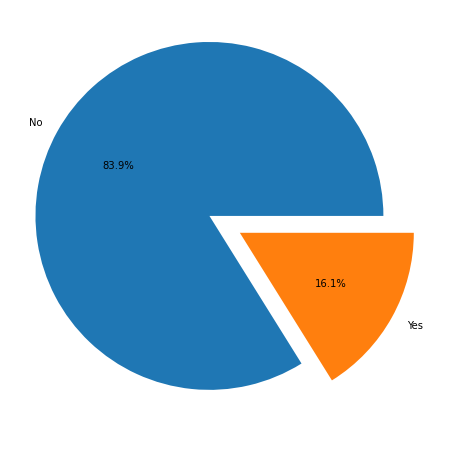

In [394]:
plt.figure(figsize=(8,8))
pie = df.groupby('Attrition')['Attrition'].count()
plt.pie(pie, explode=[0.1, 0.1], labels=['No', 'Yes'], autopct='%1.1f%%');

In [395]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [396]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1470, 44)
(1176, 44)
(294, 44)


In [397]:
models = [] # ML Models
#models.append(("Random Forest", RandomForestClassifier()))
models.append(("Logistic Regression", LogisticRegression(solver='liblinear')))
#models.append(("SVM", svm.SVC(kernel='linear')))

n_folds = 5
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=n_folds)
    print("Testing model:", name)
    
    # Cross Validation Score
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="f1_weighted", verbose=0, n_jobs=-1)
    
    # Fitting the Model
    model.fit(X_train,y_train)
    
    # Model Predictions and Finding Accuracy
    train_pred = model.predict(X_train)
    Training_score = accuracy_score(train_pred,y_train)
    test_pred = model.predict(X_test)
    Test_score = accuracy_score(test_pred,y_test)
    
    results.append(cv_results)
    
    msg = f"Cross_Val Mean: {cv_results.mean()}, Training Accuracy: {Training_score}, Testing Accuracy: {Test_score}"
    print(msg + "\n")
    
        
        
        
        
        
        
    
    
    
    


Testing model: Logistic Regression
Cross_Val Mean: 0.8813727727533947, Training Accuracy: 0.9039115646258503, Testing Accuracy: 0.8775510204081632



In [398]:
y_pred_logi=LRClassifier.decision_function(X_test)


In [399]:
prediction=LRClassifier.predict(X_test)

# 2 ) Apply bagging & boosting    

# Goal6)Ensemble Techniques on model

In [400]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(
 base_estimator=LogisticRegression(random_state=1),n_estimators=100,random_state=0)


model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9030612244897959

In [401]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(
 base_estimator=LogisticRegression(random_state=1),n_estimators=100,random_state=0)


model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8894557823129252

In [402]:
model=AdaBoostClassifier()
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('The accuracy of the AdaBoostClassifier is',metrics.accuracy_score(prediction1,y_test))

The accuracy of the AdaBoostClassifier is 0.8673469387755102


In [403]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0)
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9268707482993197

In [404]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('The accuracy of the GradientBoostingClassifier is',metrics.accuracy_score(prediction2,y_test))

The accuracy of the GradientBoostingClassifier is 0.8605442176870748


In [405]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(
 base_estimator=LogisticRegression(random_state=1),n_estimators=100,random_state=0)


model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8894557823129252

In [406]:
from xgboost import XGBClassifier
model = XGBClassifier( base_estimator=LogisticRegression, learning_rate = 1,max_depth = 20, alpha = 10, n_estimators = 1000) 

model.fit(X_train,y_train)
model.score(X_train,y_train)

0.9260204081632653

In [407]:
model=XGBClassifier()
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the XGBClassifier is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the XGBClassifier is 0.8571428571428571


# 3)  Do confusion matrix & cross validation


In [408]:
from sklearn.metrics import confusion_matrix

In [409]:
from sklearn.metrics import classification_report

In [410]:
confusion_matrix(y_test,prediction2)


array([[239,   7],
       [ 34,  14]], dtype=int64)

In [411]:
tn, fp, fn, tp = confusion_matrix(y_test,prediction2).ravel()
(tn, fp, fn, tp)


(239, 7, 34, 14)

In [412]:
matrix = classification_report(y_test,prediction2)
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       246
           1       0.67      0.29      0.41        48

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294



<AxesSubplot:>

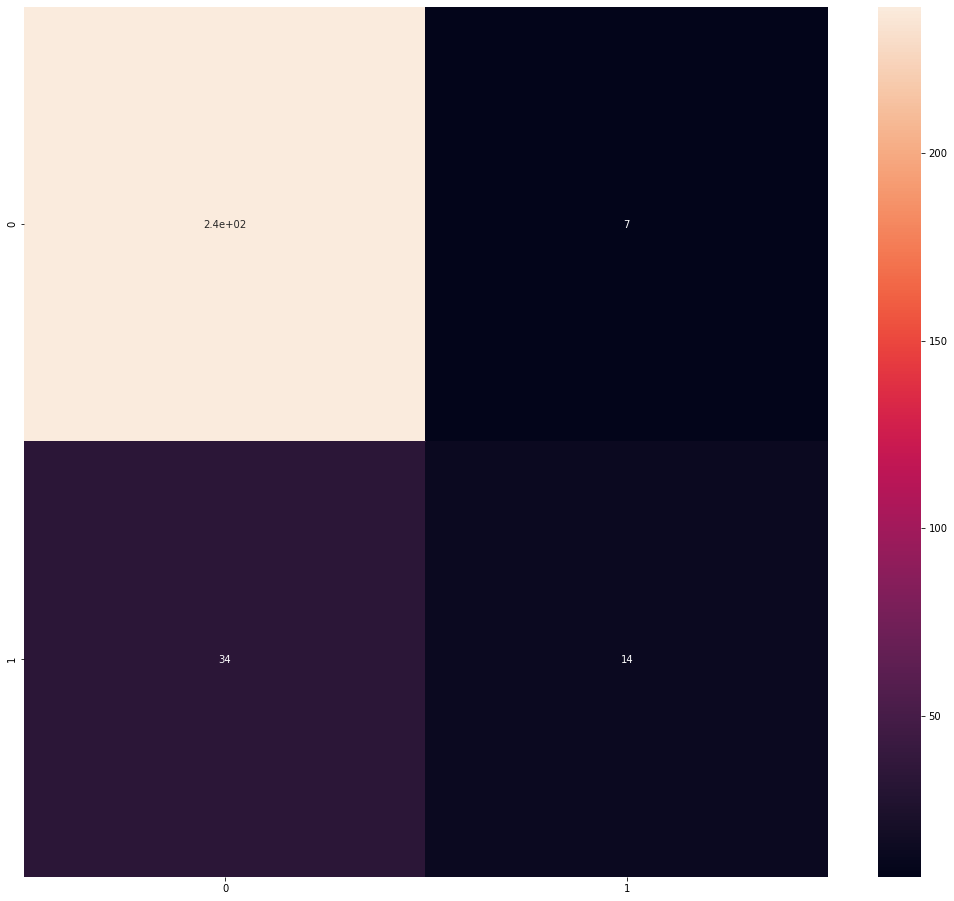

In [413]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction2), annot=True)

In [414]:

from sklearn.model_selection import cross_val_score

In [415]:
cross_val_score(LogisticRegression(),X,df.Attrition)

array([0.89795918, 0.87414966, 0.86734694, 0.89115646, 0.9047619 ])

In [416]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),X,df.Attrition)

array([0.85714286, 0.85714286, 0.86734694, 0.85714286, 0.85034014])

In [417]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,df.Attrition)


array([0.86054422, 0.86394558, 0.87755102, 0.88095238, 0.88435374])

In [418]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),X,df.Attrition)

array([0.8537415 , 0.85714286, 0.83673469, 0.85034014, 0.85714286])

In [419]:
from sklearn.tree import DecisionTreeClassifier
cross_val_score(DecisionTreeClassifier(),X,df.Attrition)

array([0.78231293, 0.7755102 , 0.81292517, 0.76530612, 0.80272109])

# 4)   Create ROC-AUC curve


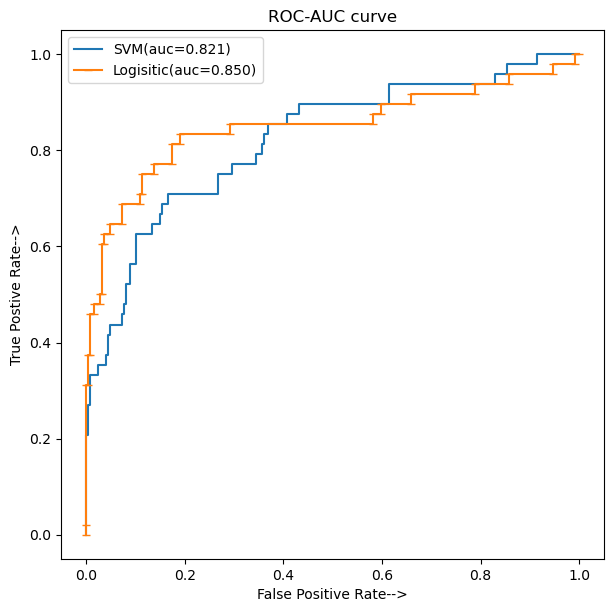

In [420]:
from sklearn.svm import SVC
SVCClassifier=SVC(random_state=4)
SVCClassifier.fit(X_train,y_train)
y_pred_SVC=SVCClassifier.decision_function(X_test)
#y_pred_logistic=LogisticRegression.decision_function(X_test)





from sklearn.metrics import roc_curve , auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred_logi)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_SVC)
auc_SVC=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(7,7),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='SVM(auc=%0.3f)'% auc_SVC)
plt.plot(logistic_fpr,logistic_tpr,marker="_",label='Logisitic(auc=%0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate-->")
plt.ylabel("True Postive Rate-->")
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

# Goal 2]      Decision Tree Classification

# 1 )    Create Model

In [421]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [422]:
df = pd.read_csv("PROJECT SUPERVISED.csv")

In [423]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [424]:
df.isna().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
BusinessTravel_Travel_Rar

In [425]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [426]:
X = df.drop('Attrition', axis=1)

In [427]:
y=df['Attrition']

In [428]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.397995,-0.891688,0.254625,-1.224807,1.785511,0.112298,1.153254,-1.054549,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1466,0.227347,-0.469754,-0.041631,-1.868426,1.169781,-1.175601,-1.026167,0.968307,-1.567907,0.989009,...,-0.533821,-0.497873,-0.462464,-0.330808,3.197088,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1467,-1.086676,-1.605183,-0.434763,0.085049,-0.660531,1.038693,1.785511,0.112298,-0.660853,0.256468,...,-0.533821,-0.497873,-0.462464,3.022901,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1468,1.322365,0.546677,-1.031607,0.085049,1.169781,-0.142264,-1.026167,0.112298,-0.660853,0.059833,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [429]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [430]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=100)

In [431]:
# Create Decision Tree classifier object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
prediction= model.predict(X_test)
y_pred_descision = model.fit(X_train, y_train).predict(X_test)


In [432]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,prediction))

Accuracy is  0.8469387755102041


# 2 ) Apply bagging & boosting


# Goal6)Ensemble Techniques on model

In [433]:
# Define a bagging classifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators = 100,
                          max_samples=0.8,oob_score=True,random_state=0)
model.fit(X_train, y_train)

#accuracy score--->training set
#model.oob_score_

model.score(X_train,y_train)

0.9991496598639455

In [434]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the GradientBoostingClassifier is',metrics.accuracy_score(prediction,y_test))

The accuracy of the GradientBoostingClassifier is 0.8605442176870748


In [435]:
accuracy=accuracy_score(y_test,prediction)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:86.05%


In [436]:
model=XGBClassifier()
model.fit(X_train,y_train)
prediction10=model.predict(X_test)
print('The accuracy of the XGBClassifier is',metrics.accuracy_score(prediction10,y_test))

The accuracy of the XGBClassifier is 0.8673469387755102


In [437]:
accuracy=accuracy_score(y_test,prediction10)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:86.73%


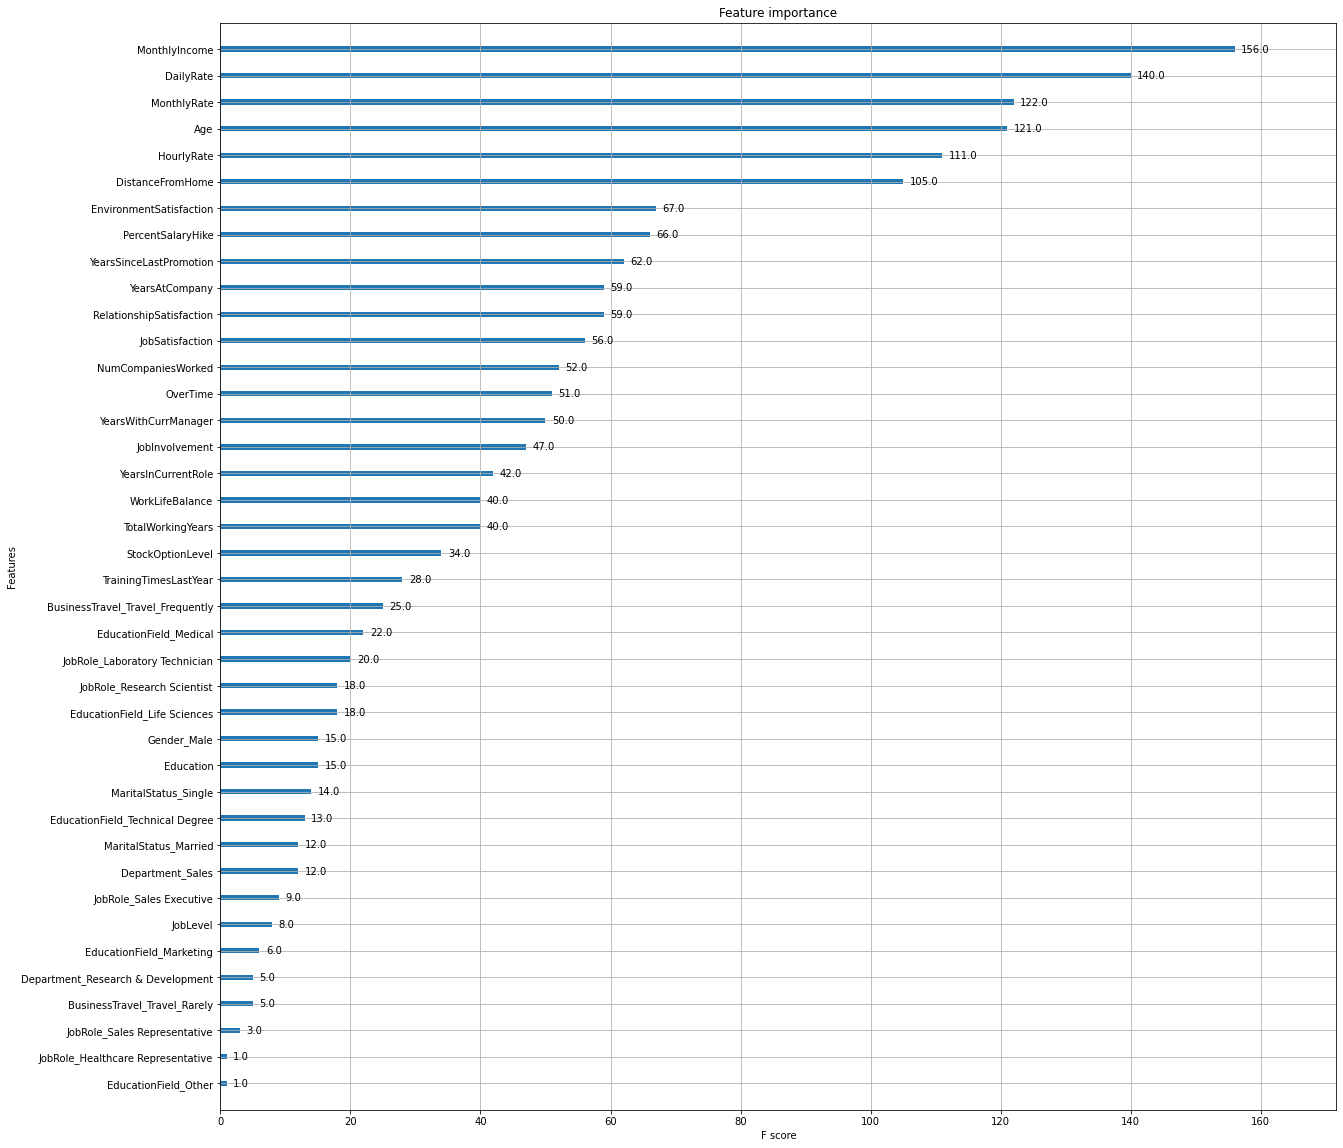

In [438]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['figure.figsize']=20,20
plot_importance(model)
pyplot.show()


# 3)Do confusion matrix & cross validation

In [439]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [440]:
confusion_matrix(y_test,prediction10)

array([[241,   6],
       [ 33,  14]], dtype=int64)

In [441]:
tn, fp, fn, tp= confusion_matrix(y_test,prediction).ravel()
(tn, fp, fn, tp)


(243, 4, 37, 10)

In [442]:
matrix = classification_report(y_test,prediction10)
print('Classification report : \n',matrix)


Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       247
           1       0.70      0.30      0.42        47

    accuracy                           0.87       294
   macro avg       0.79      0.64      0.67       294
weighted avg       0.85      0.87      0.84       294



<AxesSubplot:>

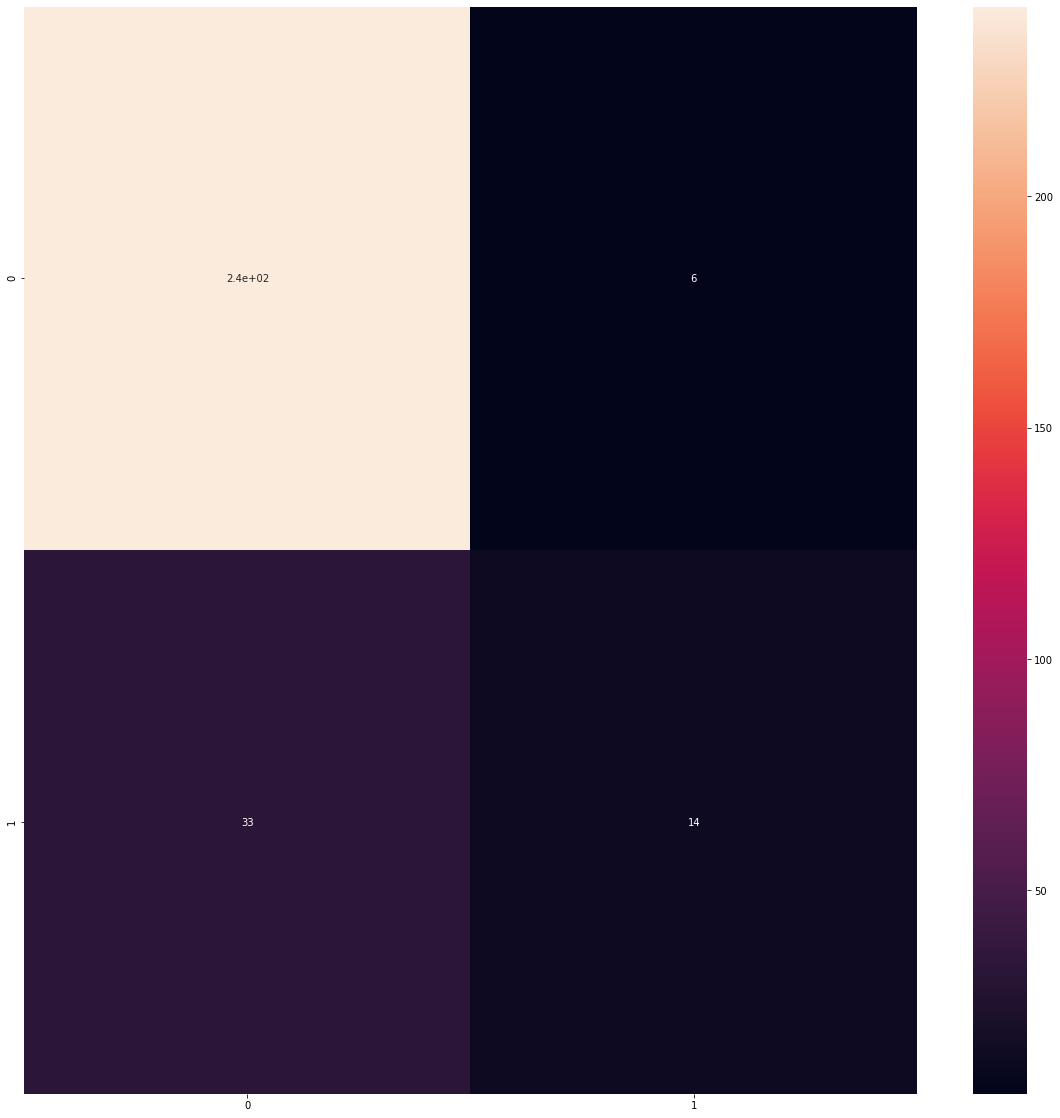

In [443]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction10), annot=True)

In [444]:
from sklearn.model_selection import cross_val_score

In [445]:
cross_val_score(DecisionTreeClassifier(),X,df.Attrition)

array([0.79251701, 0.77891156, 0.80952381, 0.74829932, 0.80952381])

In [446]:
cross_val_score(DecisionTreeClassifier(),X,df.Attrition)


array([0.80272109, 0.78231293, 0.80272109, 0.76530612, 0.80272109])

In [447]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),X,df.Attrition)

array([0.8537415 , 0.85714286, 0.83673469, 0.85034014, 0.85714286])

In [448]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),X,df.Attrition)

array([0.85034014, 0.8537415 , 0.8537415 , 0.85714286, 0.85714286])

In [449]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,df.Attrition)


array([0.86054422, 0.86394558, 0.87755102, 0.88095238, 0.88435374])

# 4)Create ROC-AUC curve

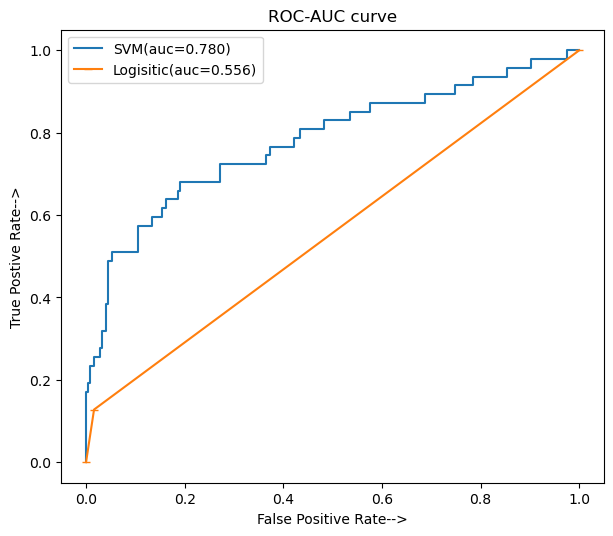

In [450]:
from sklearn.svm import SVC
SVCClassifier=SVC(random_state=2)
SVCClassifier.fit(X_train,y_train)
y_pred_SVC=SVCClassifier.decision_function(X_test)
#y_pred_logistic=LogisticRegression.decision_function(X_test)





from sklearn.metrics import roc_curve , auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred_descision)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_SVC)
auc_SVC=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(7,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='SVM(auc=%0.3f)'% auc_SVC)
plt.plot(logistic_fpr,logistic_tpr,marker="_",label='Logisitic(auc=%0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate-->")
plt.ylabel("True Postive Rate-->")
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

# Goal 3]   KNN Algorithm


# 1 )Create Model


In [451]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [452]:
df = pd.read_csv("PROJECT SUPERVISED.csv")

In [453]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,0,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,0,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,0,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [454]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [455]:
X = df.drop("Attrition",axis=1)

In [456]:
y = df["Attrition"]

In [457]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Sales Executive,JobRole_Research Scientist,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Healthcare Representative,JobRole_Manager,JobRole_Sales Representative,JobRole_Research Director,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,-0.918921,1.458650
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,...,-0.533821,2.008543,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.397995,-0.891688,0.254625,-1.224807,1.785511,0.112298,1.153254,-1.054549,...,-0.533821,-0.497873,2.162331,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1466,0.227347,-0.469754,-0.041631,-1.868426,1.169781,-1.175601,-1.026167,0.968307,-1.567907,0.989009,...,-0.533821,-0.497873,-0.462464,-0.330808,3.197088,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1467,-1.086676,-1.605183,-0.434763,0.085049,-0.660531,1.038693,1.785511,0.112298,-0.660853,0.256468,...,-0.533821,-0.497873,-0.462464,3.022901,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565
1468,1.322365,0.546677,-1.031607,0.085049,1.169781,-0.142264,-1.026167,0.112298,-0.660853,0.059833,...,1.873287,-0.497873,-0.462464,-0.330808,-0.312785,-0.273059,-0.244625,-0.239904,1.088232,-0.685565


In [458]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [459]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [460]:
from sklearn.neighbors import KNeighborsClassifier

# Create Decision Tree classifier object
model = KNeighborsClassifier(n_neighbors=4)
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
prediction= model.fit(X_train, y_train).predict(X_test)

In [461]:
prediction21=model.predict(X_test)

In [462]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,prediction21))

Accuracy is  0.8503401360544217


# 2 ) Apply bagging & boosting

# Goal6)Ensemble Techniques on model

In [463]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators = 100,
                          max_samples=0.8,oob_score=True,random_state=0)
model.fit(X_train, y_train)

#accuracy score--->training set
#model.oob_score_

model.score(X_train,y_train)

0.8673469387755102

In [464]:
model=XGBClassifier()
model.fit(X_train,y_train)
prediction21=model.predict(X_test)
print('The accuracy of the XGBClassifier is',metrics.accuracy_score(prediction21,y_test))

The accuracy of the XGBClassifier is 0.8571428571428571


In [465]:
accuracy=accuracy_score(y_test,prediction21)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:85.71%


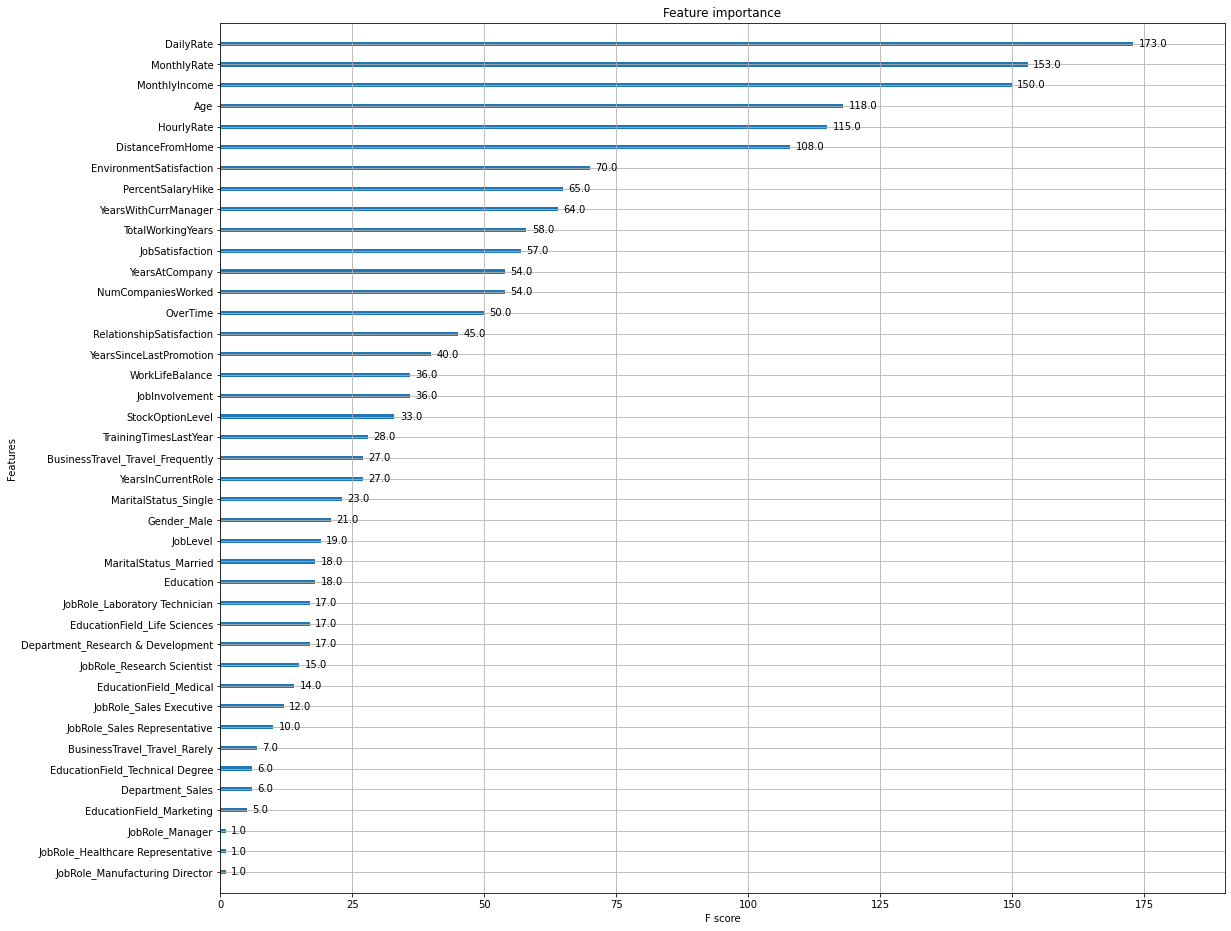

In [466]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['figure.figsize']=18,16
plot_importance(model)
pyplot.show()

In [467]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction21=model.predict(X_test)
print('The accuracy of the GradientBoostingClassifier is',metrics.accuracy_score(prediction21,y_test))

The accuracy of the GradientBoostingClassifier is 0.8707482993197279


In [468]:
accuracy=accuracy_score(y_test,prediction21)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:87.07%


# 3)Do confusion matrix & cross validation

In [469]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [470]:
confusion_matrix(y_test,prediction21)

array([[240,   5],
       [ 33,  16]], dtype=int64)

In [471]:
tn, fp, fn, tp= confusion_matrix(y_test,prediction).ravel()
(tn, fp, fn, tp)

(243, 2, 42, 7)

In [472]:
matrix = classification_report(y_test,prediction21)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



<AxesSubplot:>

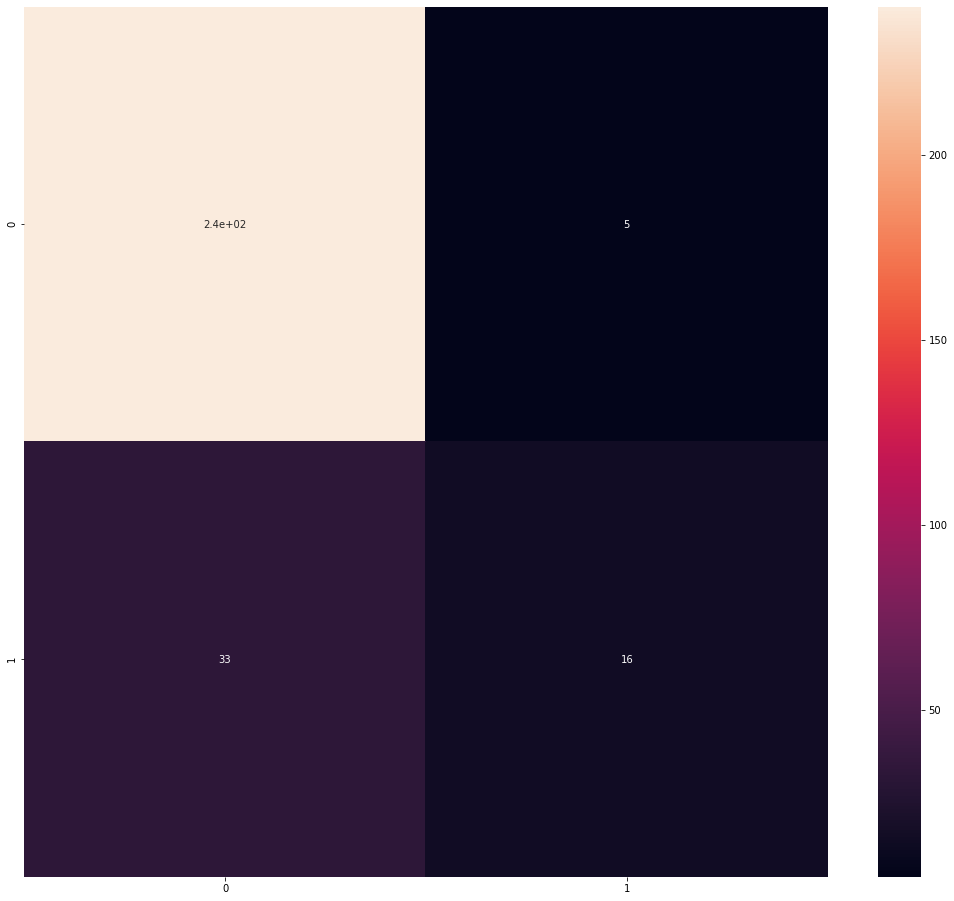

In [473]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction21), annot=True)

In [474]:
from sklearn.model_selection import cross_val_score

In [475]:
cross_val_score(KNeighborsClassifier(),X,df.Attrition)

array([0.8537415 , 0.85714286, 0.83673469, 0.85034014, 0.85714286])

In [476]:
cross_val_score(DecisionTreeClassifier(),X,df.Attrition)

array([0.78911565, 0.76190476, 0.79931973, 0.74829932, 0.78571429])

In [477]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,df.Attrition)

array([0.86054422, 0.86394558, 0.87755102, 0.88095238, 0.88435374])

# 4)Create ROC-AUC curve

In [478]:
from sklearn.linear_model import LogisticRegression
LRClassifier=LogisticRegression(random_state=10)
LRClassifier.fit(X_train,y_train)
y_pred_logistic=LRClassifier.decision_function(X_test)

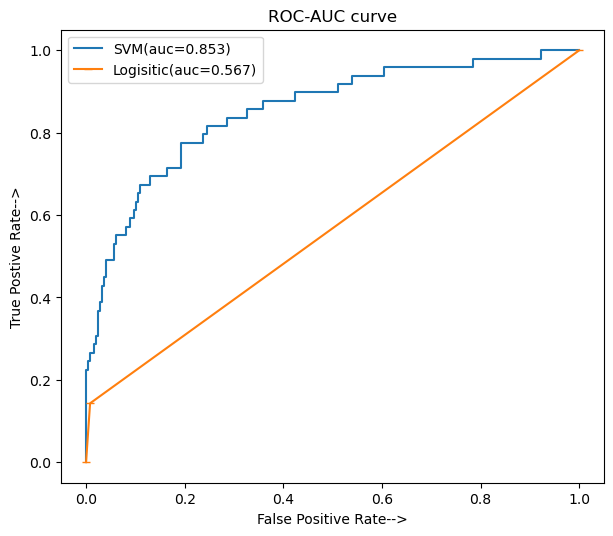

In [479]:
from sklearn.svm import SVC
SVCClassifier=SVC(random_state=10)
SVCClassifier.fit(X_train,y_train)
y_pred_SVC=SVCClassifier.decision_function(X_test)
#y_pred_logistic=LogisticRegression.decision_function(X_test)





from sklearn.metrics import roc_curve , auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,prediction)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_SVC)
auc_SVC=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(7,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='SVM(auc=%0.3f)'% auc_SVC)
plt.plot(logistic_fpr,logistic_tpr,marker="_",label='Logisitic(auc=%0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate-->")
plt.ylabel("True Postive Rate-->")
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

# Goal 4]Naïve Bayes Classifier


# 1 )Create Model


In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [481]:
df = pd.read_csv("PROJECT SUPERVISED.csv")

In [482]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [483]:
X = df.drop("Attrition",axis=1)

In [484]:
y = df["Attrition"]

In [485]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [486]:
from sklearn.naive_bayes import GaussianNB


# Create Decision Tree classifier object
model = GaussianNB()
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_GNB = model.fit(X_train, y_train).predict(X_test)

In [487]:
prediction22=model.predict(X_test)

In [488]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,prediction22))

Accuracy is  0.7006802721088435


# 2 ) Apply bagging & boosting


# Goal6)Ensemble Techniques on model

In [489]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators = 100,
                          max_samples=0.8,oob_score=True,random_state=0)
model.fit(X_train, y_train)

#accuracy score--->training set
#model.oob_score_

model.score(X_train,y_train)

0.8673469387755102

In [490]:
model=XGBClassifier()
model.fit(X_train,y_train)
prediction22=model.predict(X_test)
print('The accuracy of the XGBClassifier is',metrics.accuracy_score(prediction22,y_test))

The accuracy of the XGBClassifier is 0.8571428571428571


In [491]:
accuracy=accuracy_score(y_test,prediction21)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:87.07%


In [492]:
model=GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction50=model.predict(X_test)
print('The accuracy of the GradientBoostingClassifier is',metrics.accuracy_score(prediction50,y_test))

The accuracy of the GradientBoostingClassifier is 0.8707482993197279


In [493]:
accuracy=accuracy_score(y_test,prediction50)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:87.07%


# 3)Do confusion matrix & cross validation

In [494]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [495]:
confusion_matrix(y_test,prediction50)

array([[240,   5],
       [ 33,  16]], dtype=int64)

In [496]:
tn, fp, fn, tp= confusion_matrix(y_test,prediction50).ravel()
(tn, fp, fn, tp)

(240, 5, 33, 16)

In [497]:
matrix = classification_report(y_test,prediction50)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.76      0.33      0.46        49

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294



<AxesSubplot:>

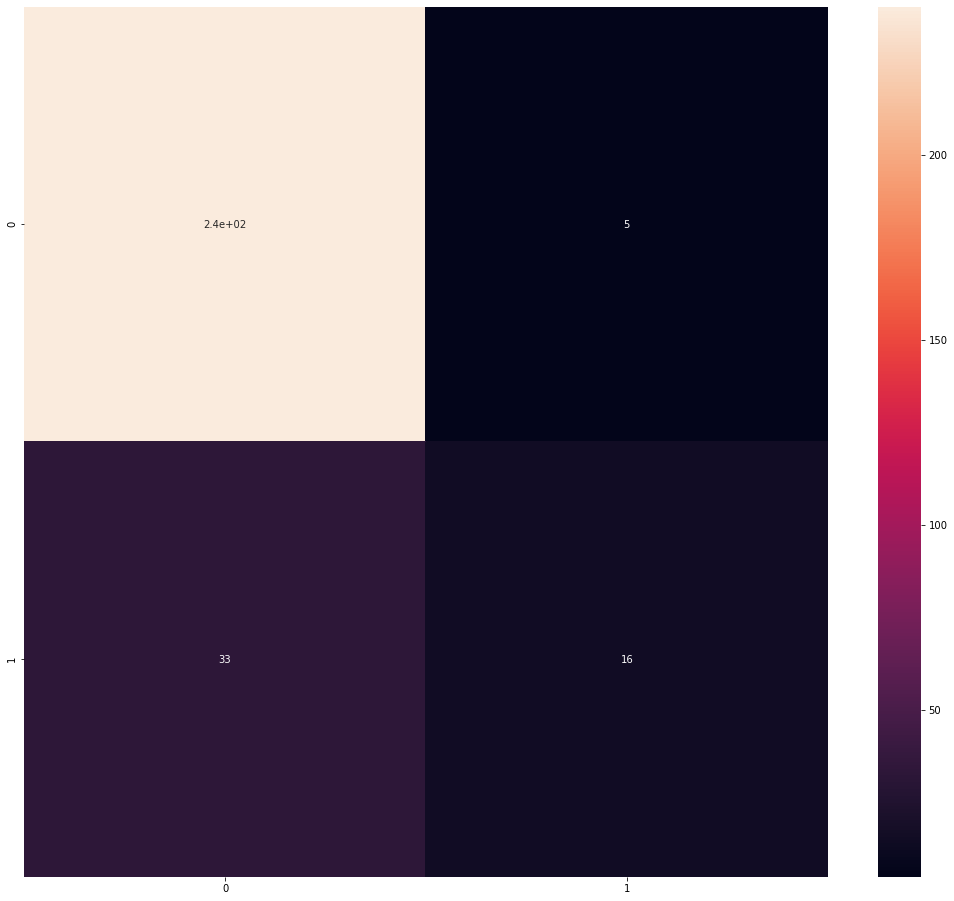

In [498]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction50), annot=True)

In [499]:
from sklearn.model_selection import cross_val_score

In [500]:
cross_val_score(GaussianNB(),X,df.Attrition)

array([0.67006803, 0.71768707, 0.68027211, 0.70748299, 0.7244898 ])

In [501]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),X,df.Attrition)

array([0.8537415 , 0.8537415 , 0.86734694, 0.85714286, 0.8537415 ])

In [502]:
from sklearn.svm import SVC
cross_val_score(SVC(),X,df.Attrition)

array([0.86054422, 0.86394558, 0.87755102, 0.88095238, 0.88435374])

In [503]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),X,df.Attrition)

array([0.8537415 , 0.85714286, 0.83673469, 0.85034014, 0.85714286])

# 4)Create ROC-AUC curve

In [504]:
from sklearn.linear_model import LogisticRegression
LRClassifier=LogisticRegression(random_state=10)
LRClassifier.fit(X_train,y_train)
y_pred_logistic=LRClassifier.decision_function(X_test)

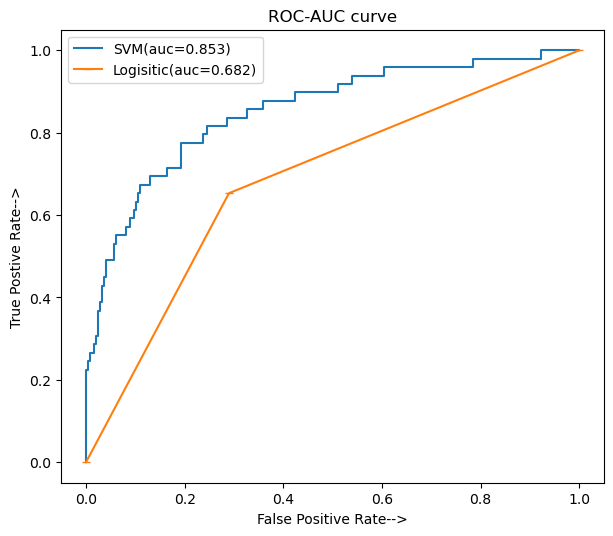

In [505]:
from sklearn.svm import SVC
SVCClassifier=SVC(random_state=10)
SVCClassifier.fit(X_train,y_train)
y_pred_SVC=SVCClassifier.decision_function(X_test)
#y_pred_logistic=LogisticRegression.decision_function(X_test)





from sklearn.metrics import roc_curve , auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred_GNB)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_SVC)
auc_SVC=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(7,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='SVM(auc=%0.3f)'% auc_SVC)
plt.plot(logistic_fpr,logistic_tpr,marker="_",label='Logisitic(auc=%0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate-->")
plt.ylabel("True Postive Rate-->")
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

# Goal 5]  SVM Algorithm

# 1 )Create Model

In [506]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [507]:
df = pd.read_csv("PROJECT SUPERVISED.csv")

In [508]:
X = df.drop("Attrition",axis=1)

In [509]:
y = df["Attrition"]

In [510]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [511]:
from sklearn.svm import SVC



# Create Decision Tree classifier object
model = SVC()
# Train Decision Tree Classifier
model = model.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_svm = model.fit(X_train, y_train).predict(X_test)

In [512]:
prediction27=model.predict(X_test)

In [513]:
from sklearn.metrics import accuracy_score
print("Accuracy is ",accuracy_score(y_test,prediction27))

Accuracy is  0.8707482993197279


# 2 ) Apply bagging & boosting

# Goal6)Ensemble Techniques on model

In [514]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator=KNeighborsClassifier(),n_estimators = 100,
                          max_samples=0.8,oob_score=True,random_state=0)
model.fit(X_train, y_train)

#accuracy score--->training set
#model.oob_score_

model.score(X_train,y_train)

0.8673469387755102

In [515]:
model=XGBClassifier()
model.fit(X_train,y_train)
prediction27=model.predict(X_test)
print('The accuracy of the XGBClassifier is',metrics.accuracy_score(prediction27,y_test))

The accuracy of the XGBClassifier is 0.8571428571428571


In [516]:
accuracy=accuracy_score(y_test,prediction27)
print("Accuracy:%.2f%%" %(accuracy *100.0))

Accuracy:85.71%


# 3)Do confusion matrix & cross validation

In [517]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [518]:
confusion_matrix(y_test,prediction27)

array([[238,   7],
       [ 35,  14]], dtype=int64)

In [519]:
tn, fp, fn, tp= confusion_matrix(y_test,prediction).ravel()
(tn, fp, fn, tp)


(243, 2, 42, 7)

In [520]:
matrix = classification_report(y_test,prediction27)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.67      0.29      0.40        49

    accuracy                           0.86       294
   macro avg       0.77      0.63      0.66       294
weighted avg       0.84      0.86      0.83       294



<AxesSubplot:>

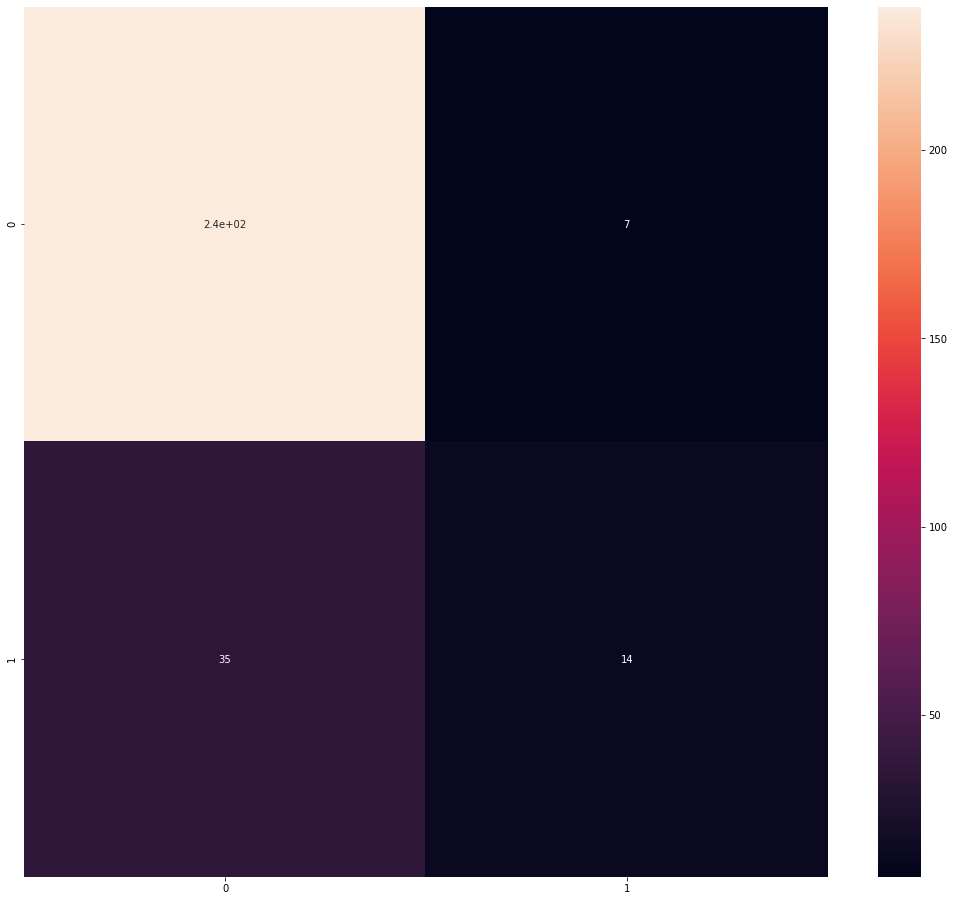

In [521]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,prediction27), annot=True)

In [522]:
from sklearn.model_selection import cross_val_score

In [523]:
cross_val_score(SVC(),X,df.Attrition)


array([0.86054422, 0.86394558, 0.87755102, 0.88095238, 0.88435374])

In [524]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(n_estimators=40),X,df.Attrition)

array([0.85714286, 0.85034014, 0.85714286, 0.86394558, 0.86394558])

In [525]:
from sklearn.neighbors import KNeighborsClassifier
cross_val_score(KNeighborsClassifier(),X,df.Attrition)

array([0.8537415 , 0.85714286, 0.83673469, 0.85034014, 0.85714286])

# 4)Create ROC-AUC curve

In [526]:
from sklearn.linear_model import LogisticRegression
LRClassifier=LogisticRegression(random_state=4)
LRClassifier.fit(X_train,y_train)
y_pred_logistic=LRClassifier.decision_function(X_test)

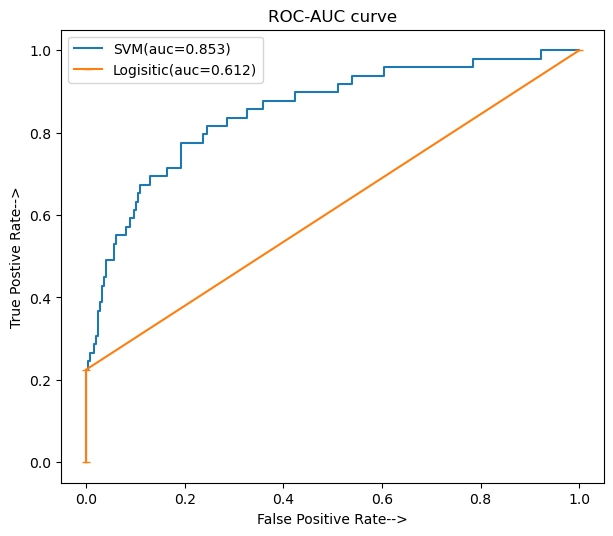

In [527]:
from sklearn.svm import SVC
SVCClassifier=SVC(random_state=4)
SVCClassifier.fit(X_train,y_train)
y_pred_SVC=SVCClassifier.decision_function(X_test)
#y_pred_logistic=LogisticRegression.decision_function(X_test)





from sklearn.metrics import roc_curve , auc

logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_pred_svm)
auc_logistic=auc(logistic_fpr,logistic_tpr)


svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_SVC)
auc_SVC=auc(svm_fpr,svm_tpr)


plt.figure(figsize=(7,6),dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle="-",label='SVM(auc=%0.3f)'% auc_SVC)
plt.plot(logistic_fpr,logistic_tpr,marker="_",label='Logisitic(auc=%0.3f)' % auc_logistic)

plt.xlabel("False Positive Rate-->")
plt.ylabel("True Postive Rate-->")
plt.title('ROC-AUC curve')
plt.legend()